In [1]:
import scanpy as sc
import omicverse as ov
ov.plot_set()


   ____            _     _    __                  
  / __ \____ ___  (_)___| |  / /__  _____________ 
 / / / / __ `__ \/ / ___/ | / / _ \/ ___/ ___/ _ \ 
/ /_/ / / / / / / / /__ | |/ /  __/ /  (__  )  __/ 
\____/_/ /_/ /_/_/\___/ |___/\___/_/  /____/\___/                                              

Version: 1.6.11, Tutorials: https://omicverse.readthedocs.io/
Dependency error: The 'phate>=1.0' distribution was not found and is required by the application


In [2]:
adata = ov.read('/home/lugli/spuccio/Projects/SP039/GBmap/Ruiz2022_Part1.h5ad')

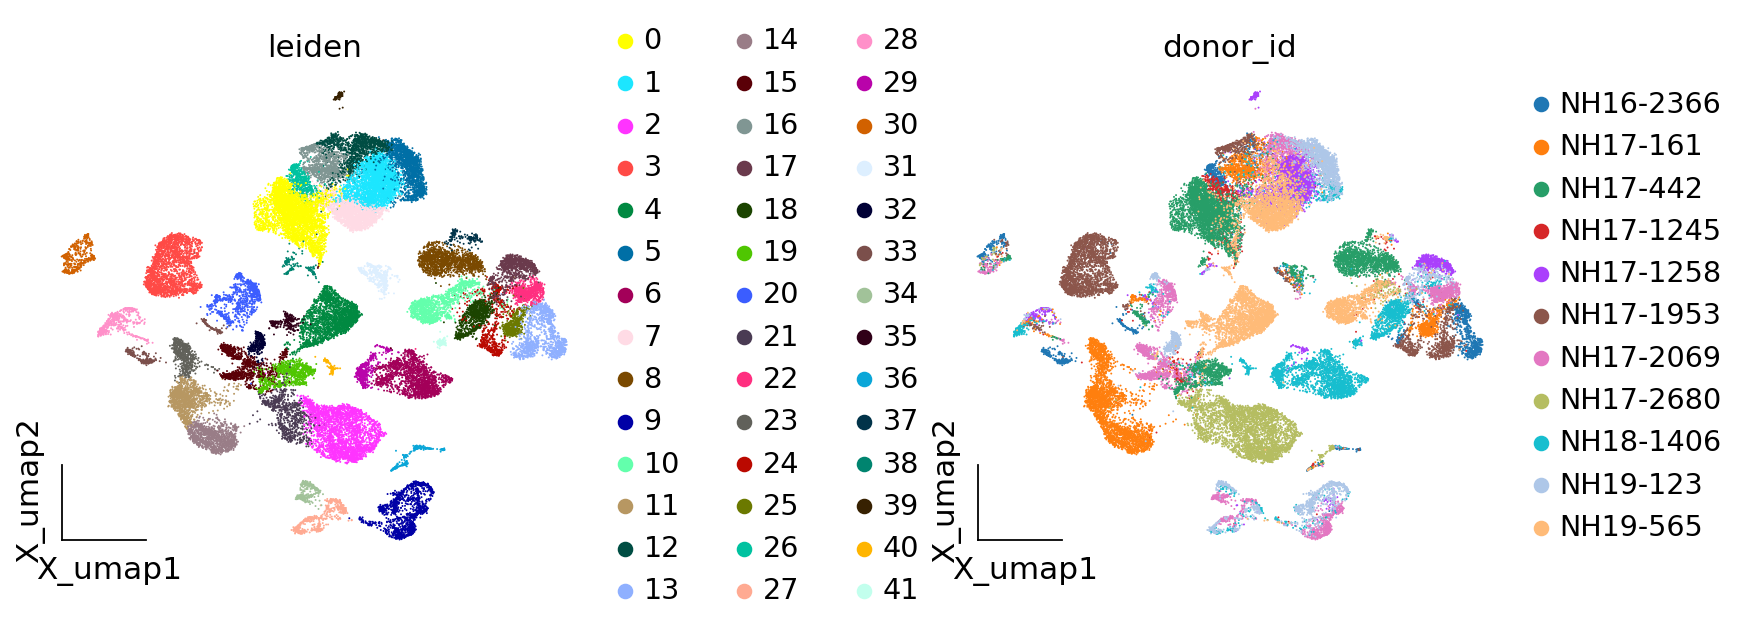

In [3]:
ov.pl.embedding(adata,
                basis='X_umap',
                color=['leiden', 'donor_id'],
                frameon='small',wspace=0.5)

In [4]:
ov.single.batch_correction(adata,batch_key='donor_id',
                                        methods='harmony',n_pcs=50)
adata

...Begin using harmony to correct batch effect


2025-03-31 17:51:32,042 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2025-03-31 17:51:36,378 - harmonypy - INFO - sklearn.KMeans initialization complete.
2025-03-31 17:51:36,519 - harmonypy - INFO - Iteration 1 of 10
2025-03-31 17:51:46,242 - harmonypy - INFO - Iteration 2 of 10
2025-03-31 17:52:03,116 - harmonypy - INFO - Iteration 3 of 10
2025-03-31 17:52:13,021 - harmonypy - INFO - Iteration 4 of 10
2025-03-31 17:52:21,604 - harmonypy - INFO - Iteration 5 of 10
2025-03-31 17:52:38,429 - harmonypy - INFO - Converged after 5 iterations


AnnData object with n_obs × n_vars = 39124 × 2000
    obs: 'author', 'donor_id', 'is_primary_data', 'annotation_level_1', 'annotation_level_2', 'annotation_level_3', 'gbmap', 'method', 'stage', 'location', 'EGFR', 'MET', 'p53', 'TERT', 'ATRX', 'PTEN', 'MGMT', 'chr1p19q', 'PDGFR', 'suspension_type', 'tissue_ontology_term_id', 'cell_type', 'assay', 'tissue', 'development_stage', 'nUMIs', 'mito_perc', 'detected_genes', 'cell_complexity', 'sccomposite_doublet', 'sccomposite_consistency', 'passing_mt', 'passing_nUMIs', 'passing_ngenes', 'n_genes', 'leiden'
    var: 'mt', 'n_cells', 'percent_cells', 'robust', 'means', 'variances', 'residual_variances', 'highly_variable_rank', 'highly_variable_features'
    uns: 'X_approximate_distribution', 'batch_condition', 'default_embedding', 'donor_id_colors', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'scaled|original|cum_sum_eigenvalues', 'scaled|original|pca_var_ratios', 'schema_version', 'title', 'umap'
    obsm: 'X_pca', 'X_umap

In [5]:
ov.pp.neighbors(adata, n_neighbors=15, n_pcs=50,
               use_rep='X_harmony')

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:27)


In [6]:
%%time
ov.pp.umap(adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm)
    'umap', UMAP parameters (adata.uns) (0:00:35)
CPU times: user 42.4 s, sys: 47 s, total: 1min 29s
Wall time: 35.1 s


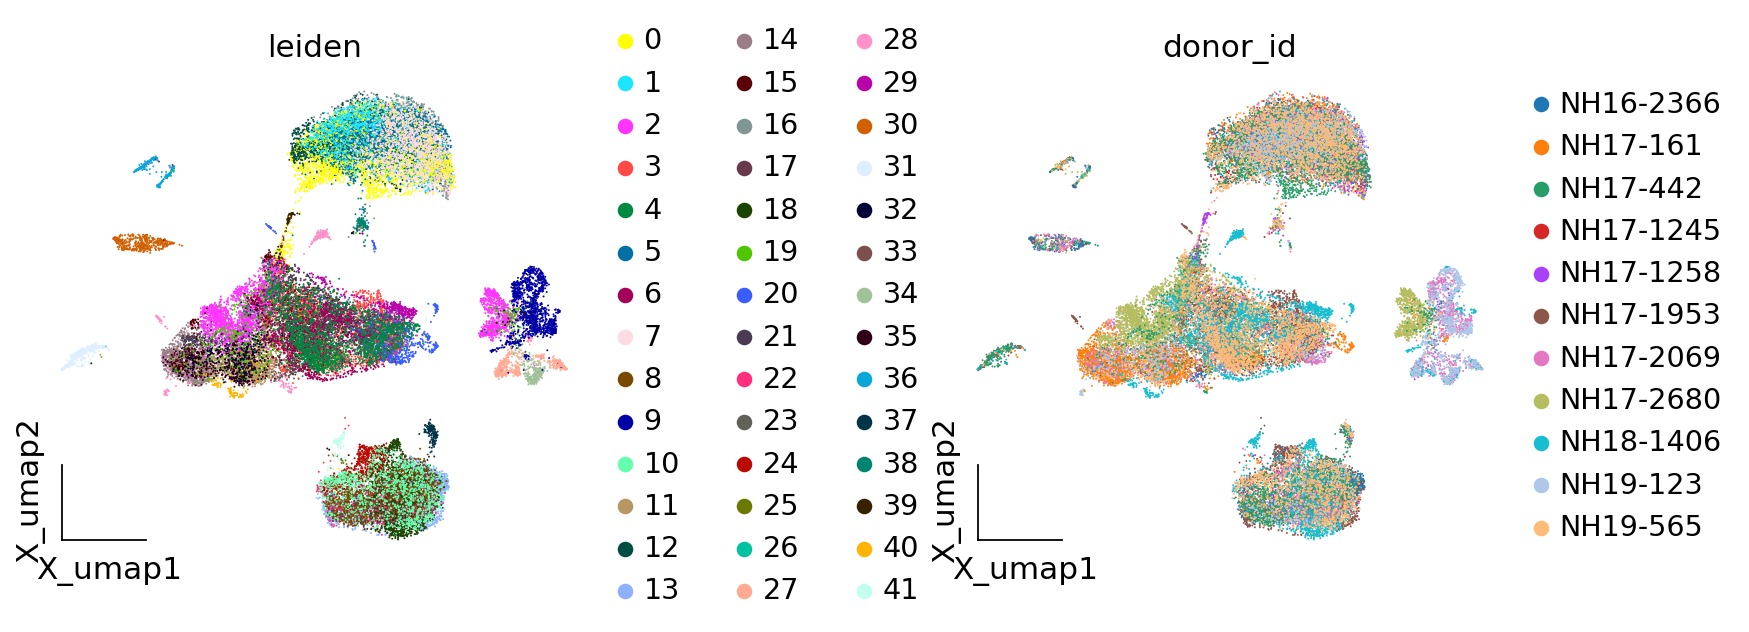

In [7]:
ov.pl.embedding(adata,
                basis='X_umap',
                color=['leiden', 'donor_id'],
                frameon='small',wspace=0.5)

In [8]:
ov.pp.leiden(adata,resolution=0.5)

running Leiden clustering
    finished: found 17 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:15)


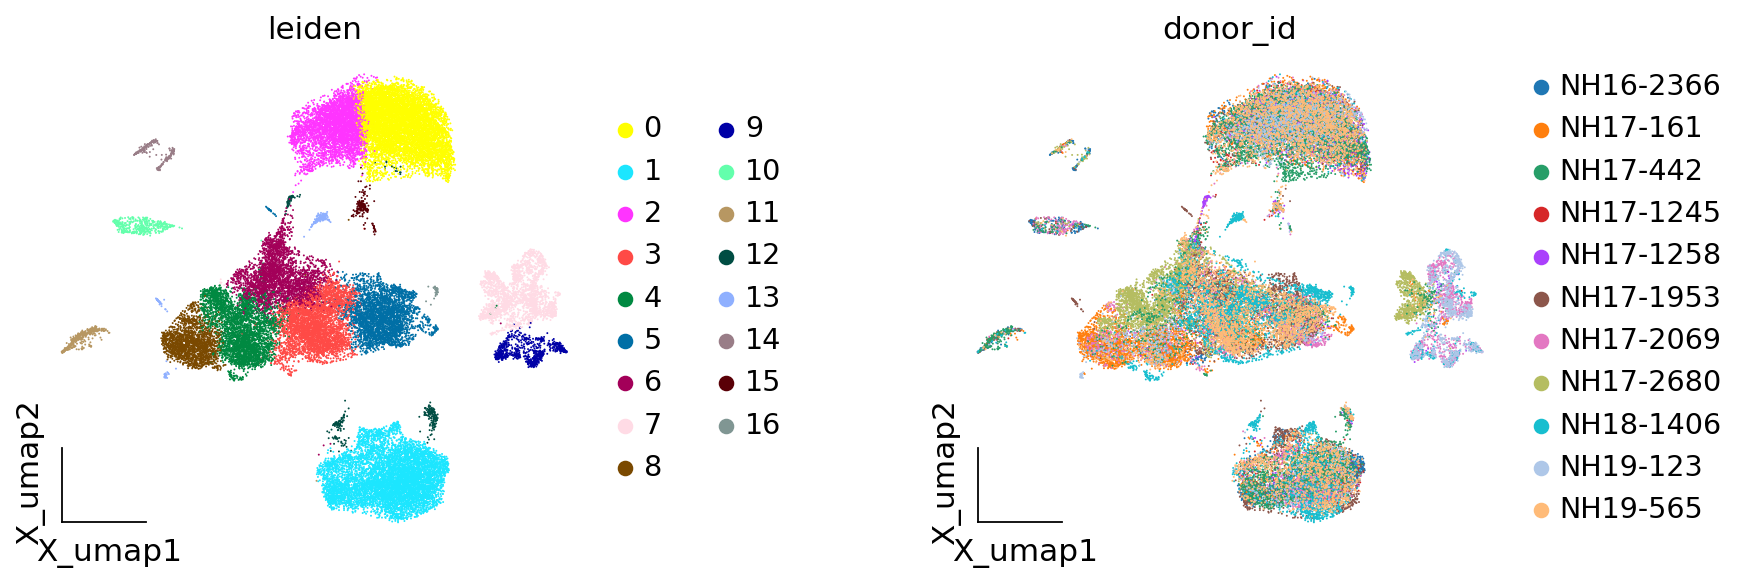

In [9]:
ov.pl.embedding(adata,
                basis='X_umap',
                color=['leiden', 'donor_id'],
                frameon='small',wspace=0.5)

In [10]:
scsa=ov.single.pySCSA(adata=adata,
                      foldchange=1.5,
                      pvalue=0.01,
                      celltype='normal',
                      target='cellmarker',
                      tissue='Brain',
                      model_path='/home/lugli/spuccio/Projects/SP039/pySCSA_2024_v1_plus.db'                    
)

In [11]:
anno=scsa.cell_anno(clustertype='leiden',
               cluster='all',rank_rep=True)

ranking genes
    finished (0:01:14)
...Auto annotate cell
Version V2.2 [2024/12/18]
DB load: GO_items:47347,Human_GO:3,Mouse_GO:3,
CellMarkers:82887,CancerSEA:1574,PanglaoDB:24223
Ensembl_HGNC:61541,Ensembl_Mouse:55414
Version V2.2 [2024/12/18]
DB load: GO_items:47347,Human_GO:3,Mouse_GO:3,
CellMarkers:82887,CancerSEA:1574,PanglaoDB:24223
Ensembl_HGNC:61541,Ensembl_Mouse:55414
load markers: 8838
Cluster 0 Gene number: 1191
Other Gene number: 1057
Cluster 1 Gene number: 1460
Other Gene number: 1019
Cluster 10 Gene number: 931
Other Gene number: 1054
Cluster 11 Gene number: 640
Other Gene number: 1042
Cluster 12 Gene number: 1028
Other Gene number: 1054
Cluster 13 Gene number: 1930
Other Gene number: 1062
Cluster 14 Gene number: 726
Other Gene number: 1062
Cluster 15 Gene number: 1664
Other Gene number: 1064
Cluster 16 Gene number: 1233
Other Gene number: 1067
Cluster 2 Gene number: 326
Other Gene number: 1067
Cluster 3 Gene number: 1392
Other Gene number: 1063
Cluster 4 Gene number: 11

In [12]:
scsa.cell_auto_anno(adata,key='scsa_celltype_cellmarker')

...cell type added to scsa_celltype_cellmarker on obs of anndata


In [13]:
scsa=ov.single.pySCSA(adata=adata,
                          foldchange=1.5,
                          pvalue=0.01,
                          celltype='normal',
                          target='panglaodb',
                          tissue='Brain',
                          model_path='/home/lugli/spuccio/Projects/SP039/pySCSA_2024_v1_plus.db'
                          
)

In [14]:
res=scsa.cell_anno(clustertype='leiden',
               cluster='all',rank_rep=True)

ranking genes
    finished (0:01:15)
...Auto annotate cell
Version V2.2 [2024/12/18]
DB load: GO_items:47347,Human_GO:3,Mouse_GO:3,
CellMarkers:82887,CancerSEA:1574,PanglaoDB:24223
Ensembl_HGNC:61541,Ensembl_Mouse:55414
Version V2.2 [2024/12/18]
DB load: GO_items:47347,Human_GO:3,Mouse_GO:3,
CellMarkers:82887,CancerSEA:1574,PanglaoDB:24223
Ensembl_HGNC:61541,Ensembl_Mouse:55414
load markers: 8838
Cluster 0 Gene number: 1191
Other Gene number: 3885
Cluster 1 Gene number: 1460
Other Gene number: 3773
Cluster 10 Gene number: 931
Other Gene number: 3877
Cluster 11 Gene number: 640
Other Gene number: 3879
Cluster 12 Gene number: 1028
Other Gene number: 3949
Cluster 13 Gene number: 1930
Other Gene number: 3940
Cluster 14 Gene number: 726
Other Gene number: 3932
Cluster 15 Gene number: 1664
Other Gene number: 3938
Cluster 16 Gene number: 1233
Other Gene number: 3948
Cluster 2 Gene number: 326
Other Gene number: 3959
Cluster 3 Gene number: 1392
Other Gene number: 3935
Cluster 4 Gene number: 11

In [15]:
scsa.cell_anno_print()

Nice:Cluster:0	Cell_type:Oligodendrocytes	Z-score:7.627
Cluster:1	Cell_type:Macrophages|Microglia	Z-score:3.972|3.694
Nice:Cluster:2	Cell_type:Oligodendrocytes	Z-score:6.995
Cluster:3	Cell_type:Bergmann Glia|Müller Cells	Z-score:2.677|2.247
Cluster:4	Cell_type:Interneurons|Neurons	Z-score:3.759|3.093
Cluster:5	Cell_type:Fibroblasts|Müller Cells	Z-score:2.477|2.428
Cluster:6	Cell_type:Enteroendocrine Cells|Parathyroid Chief Cells	Z-score:3.616|2.318
Cluster:7	Cell_type:Interneurons|Neurons	Z-score:4.81|4.453
Cluster:8	Cell_type:Interneurons|Neurons	Z-score:3.159|3.11
Cluster:9	Cell_type:Interneurons|Neurons	Z-score:4.893|4.285
Nice:Cluster:10	Cell_type:Endothelial Cells	Z-score:8.445
Cluster:11	Cell_type:T Cells|T Memory Cells	Z-score:3.646|3.575
Cluster:12	Cell_type:Macrophages|Microglia	Z-score:4.226|4.106
Cluster:13	Cell_type:Interneurons|Neurons	Z-score:3.96|3.357
Cluster:14	Cell_type:Fibroblasts|Mesangial Cells	Z-score:3.46|2.87
Cluster:15	Cell_type:Oligodendrocytes|Neurons	Z-score

In [16]:
scsa.cell_auto_anno(adata,key='scsa_celltype_panglaodb')

...cell type added to scsa_celltype_panglaodb on obs of anndata


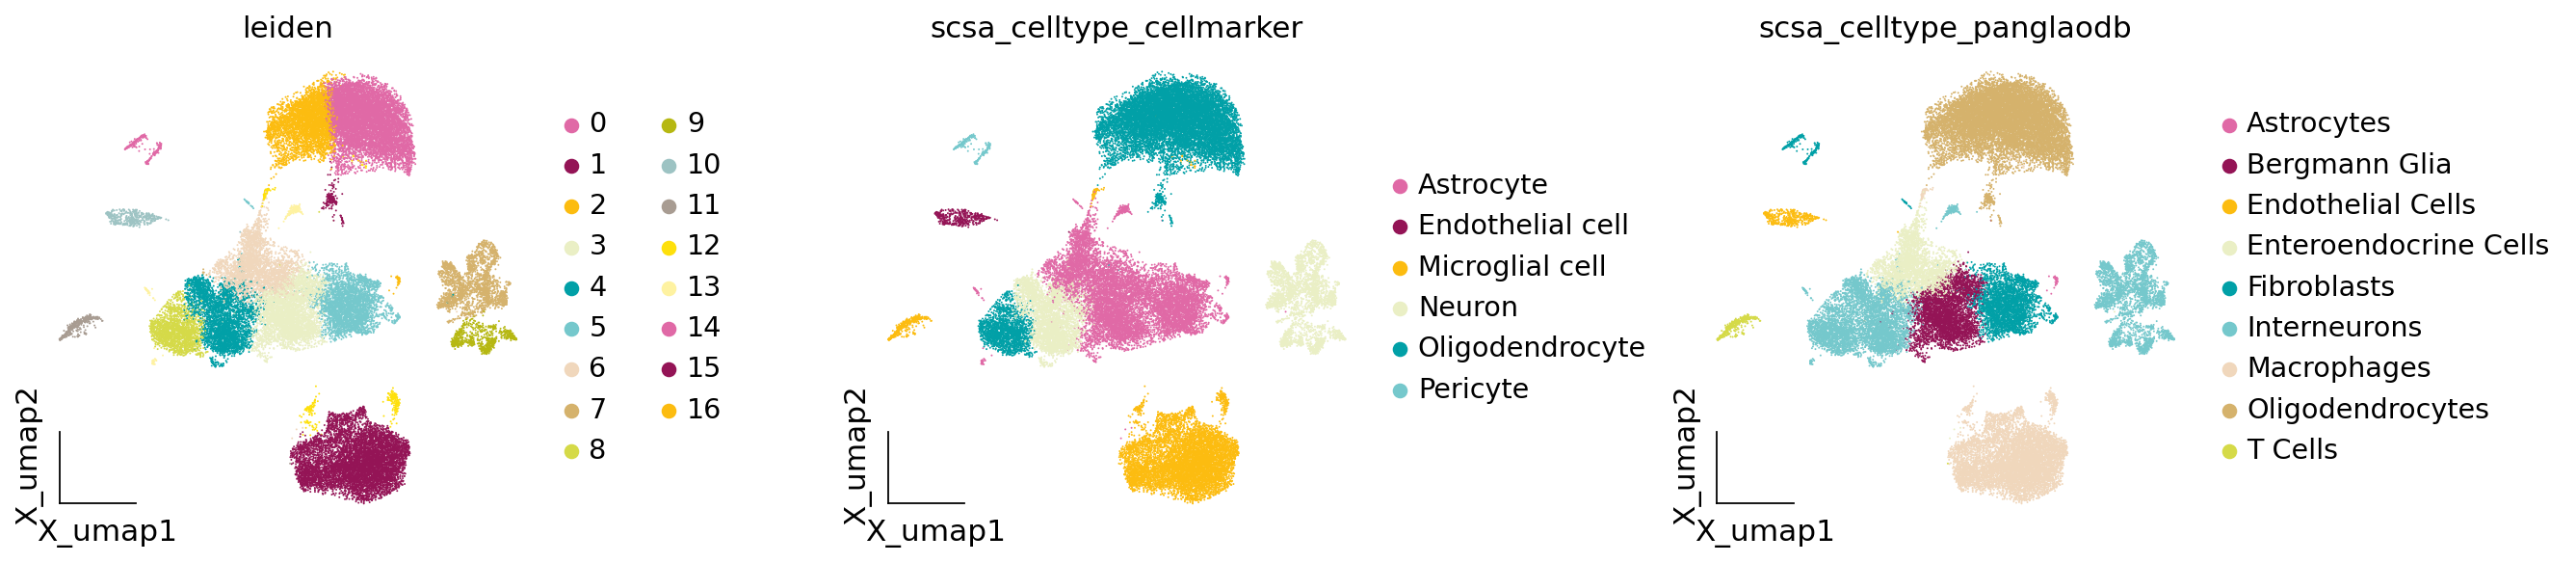

In [17]:
ov.utils.embedding(adata,
                   basis='X_umap',
                   color=['leiden','scsa_celltype_cellmarker','scsa_celltype_panglaodb'],
                   frameon='small',
                   legend_fontoutline=2,palette=ov.utils.palette()[14:],wspace=0.5
                  )

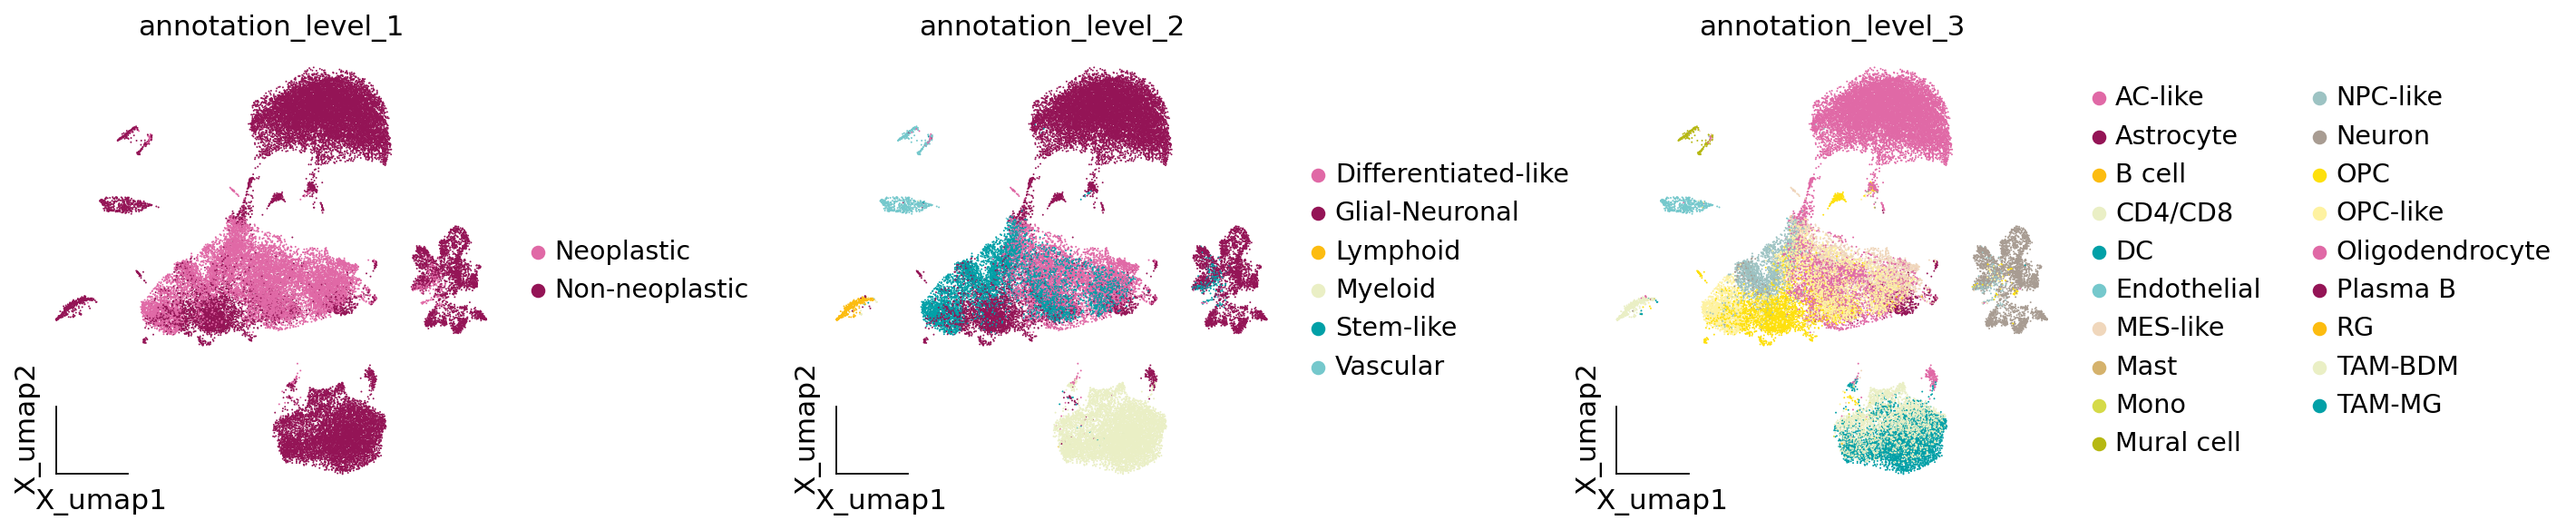

In [18]:
ov.utils.embedding(adata,
                   basis='X_umap',
                   color=['annotation_level_1','annotation_level_2','annotation_level_3'],
                   frameon='small',
                   legend_fontoutline=2,palette=ov.utils.palette()[14:],wspace=0.5
                  )

In [19]:
adata

AnnData object with n_obs × n_vars = 39124 × 2000
    obs: 'author', 'donor_id', 'is_primary_data', 'annotation_level_1', 'annotation_level_2', 'annotation_level_3', 'gbmap', 'method', 'stage', 'location', 'EGFR', 'MET', 'p53', 'TERT', 'ATRX', 'PTEN', 'MGMT', 'chr1p19q', 'PDGFR', 'suspension_type', 'tissue_ontology_term_id', 'cell_type', 'assay', 'tissue', 'development_stage', 'nUMIs', 'mito_perc', 'detected_genes', 'cell_complexity', 'sccomposite_doublet', 'sccomposite_consistency', 'passing_mt', 'passing_nUMIs', 'passing_ngenes', 'n_genes', 'leiden', 'scsa_celltype_cellmarker', 'scsa_celltype_panglaodb'
    var: 'mt', 'n_cells', 'percent_cells', 'robust', 'means', 'variances', 'residual_variances', 'highly_variable_rank', 'highly_variable_features'
    uns: 'X_approximate_distribution', 'batch_condition', 'default_embedding', 'donor_id_colors', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'scaled|original|cum_sum_eigenvalues', 'scaled|original|pca_var_ratios', 'sche

In [20]:
del adata.obs['is_primary_data']

In [21]:
del adata.obs['gbmap']

In [22]:
del adata.obs['tissue_ontology_term_id']

In [23]:
adata.write("/home/lugli/spuccio/Projects/SP039/GBmap/Ruiz2022_Part2.h5ad")

In [24]:
adata

AnnData object with n_obs × n_vars = 39124 × 2000
    obs: 'author', 'donor_id', 'annotation_level_1', 'annotation_level_2', 'annotation_level_3', 'method', 'stage', 'location', 'EGFR', 'MET', 'p53', 'TERT', 'ATRX', 'PTEN', 'MGMT', 'chr1p19q', 'PDGFR', 'suspension_type', 'cell_type', 'assay', 'tissue', 'development_stage', 'nUMIs', 'mito_perc', 'detected_genes', 'cell_complexity', 'sccomposite_doublet', 'sccomposite_consistency', 'passing_mt', 'passing_nUMIs', 'passing_ngenes', 'n_genes', 'leiden', 'scsa_celltype_cellmarker', 'scsa_celltype_panglaodb'
    var: 'mt', 'n_cells', 'percent_cells', 'robust', 'means', 'variances', 'residual_variances', 'highly_variable_rank', 'highly_variable_features'
    uns: 'X_approximate_distribution', 'batch_condition', 'default_embedding', 'donor_id_colors', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'scaled|original|cum_sum_eigenvalues', 'scaled|original|pca_var_ratios', 'schema_version', 'title', 'umap', 'rank_genes_groups', 'scs